In [172]:
%reset

요구 동작 <br>
0. Trial folder 경로가 주어짐 <br>
1. 해당 폴더 내의 모든 txt 파일 읽어서 시간축 처리 <br>
2. 전처리 전의 정보 요약 <br>
    2-1. 센서 측정 최초 시각 <br>
    2-2. 센서 측정 마지막 시각 <br>
    2-3. 측정 데이터 개수 <br>
    2-4. 센서 측정 시간 간격 분포 <br>
    2-5. 센서 그래프 <br>
3. 보간 <br>
    3-1. 보간 전후 차이 (그래프 비교) <br>
4. 보간 후 정보 요약 <br>
    4-1. FFT 결과 <br>
    4-2. Acc, Acc 적분 값, GPS에서 추정한 구간 별 평균이동속도 <br>
    4-3. Gyro, Gyro 적분 값, GPS에서 추정한 구간 별 이동방향 <br>
5. 필터링 <br>
    5-1. 필터링 전후 차이 (그래프 비교) <br>
    5-2. 필터링 전후 차이 (FFT 비교) <br>
6. 지도 위에 GPS 그리기 <br>
    6-1. Acc 데이터 회전 <br>
    6-2. 회전한 Acc 이중적분 결과 <br>
    6-3. 회전한 Acc 이중적분 결과 + GPS

In [286]:
import importlib
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('/home/jaeho/Workspace')
# sampledatapath = './ipinlabs/SampleData'
sampledatapath = './ins_log'

In [174]:
print(os.getcwd())

/home/jaeho/Workspace


In [175]:
import ipinlabs.sensorio.Data as Data
import ipinlabs.sensorio.utils as utils

In [176]:
def reload():
    # Try to reload modules and raise error if failed.
    try:
        importlib.reload(Data)
        print('ipinlabs.io.Data reloaded')
    except:
        raise Exception('Failed to reload ipinlabs.io.Data')

    try:
        importlib.reload(utils)
        print('ipinlabs.io.utils reloaded')
    except:
        raise Exception('Failed to reload ipinlabs.io.utils')
    return None

In [310]:
reload()

ipinlabs.io.Data reloaded
ipinlabs.io.utils reloaded


In [311]:
foo = Data.TrialData('./ins_log/1680920302405')

In [312]:
bar = foo.interpolate()

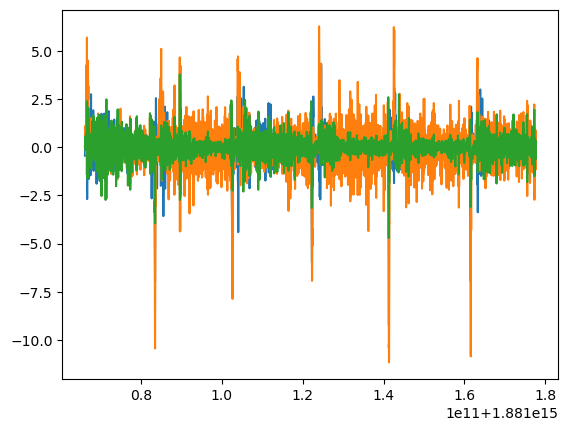

In [314]:
plt.plot(bar[0].Time, bar[0].iloc[:,1:])

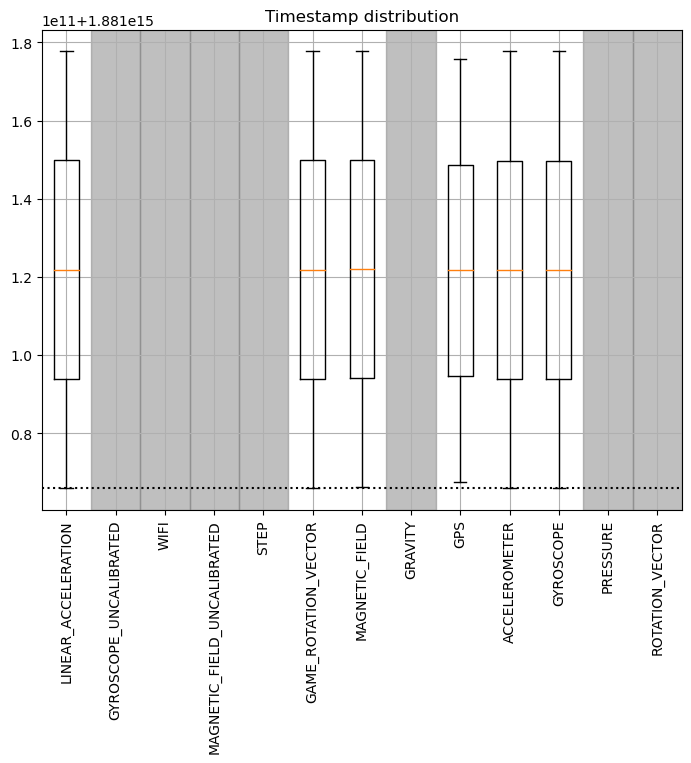

In [261]:
time_desc = foo.describe_time()

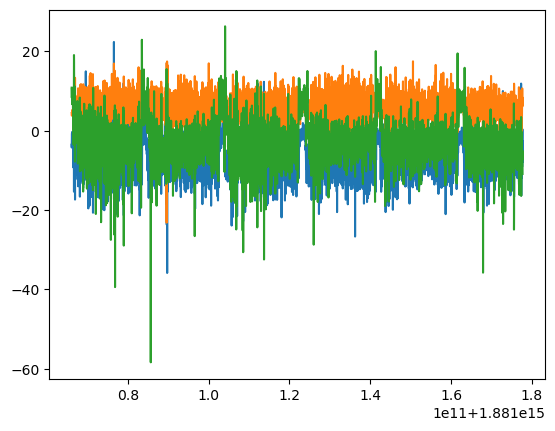

In [264]:
import matplotlib.pyplot as plt
plt.plot(foo.sensors['ACCELEROMETER'].dataframe.Time,foo.sensors['ACCELEROMETER'].dataframe.iloc[:,1:])

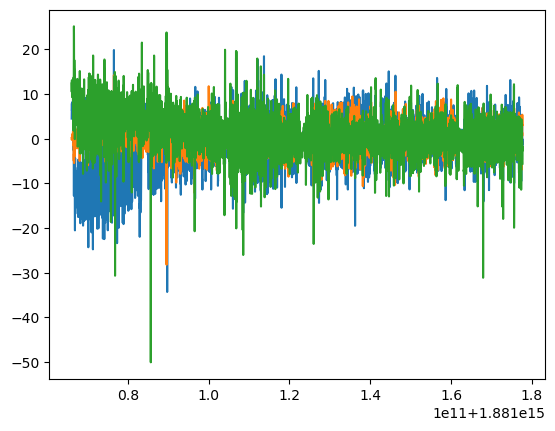

In [266]:
plt.plot(foo.sensors['LINEAR_ACCELERATION'].dataframe.Time,foo.sensors['LINEAR_ACCELERATION'].dataframe.iloc[:,1:])

# File level Data I/O

## Read file

In [4]:
opt = {'sep':'\t', 'header':None, 'comment':'#'}
# foo = utils.FileFromCsv(os.path.join(sampledatapath,'acc.txt'), opt)
foo = utils.FileFromCsv(os.path.join(sampledatapath,'wifi.txt'), opt)

## Print (str, repr, repr_html) object
FileFromCsv object basically returns the output of str, repr, repr_html defined by pandas dataframe

In [5]:
# repr_html
foo

,Time,Mac,RSSI,Var_Unknown_placeholder,SSID
0,277474894705000,58:86:94:59:fc:36,-62,5785,Antigravity
1,277474894705000,94:bf:c4:32:c5:f8,-49,2472,hub_sungsoo
2,277474894705000,58:86:94:59:fc:34,-51,2422,Antigravity
3,277474894705000,70:ca:97:07:d6:bc,-71,5200,hub_sungsoo
4,277474894705000,70:5d:cc:e7:7c:7c,-64,5745,sungha_5G
...,...,...,...,...,...
269,277489938628000,44:48:c1:10:fc:d5,-84,5260,SEOUL APP
270,277489938628000,44:48:c1:5a:67:b0,-62,5260,SBA_Business
271,277489938628000,44:48:c1:10:fc:d6,-83,5260,SEOUL APP2
272,277489938628000,b4:a9:4f:5c:60:02,-56,2452,tan3


In [6]:
# repr
repr(foo)

'                Time                Mac  RSSI  Var_Unknown_placeholder  \\\n0    277474894705000  58:86:94:59:fc:36   -62                     5785   \n1    277474894705000  94:bf:c4:32:c5:f8   -49                     2472   \n2    277474894705000  58:86:94:59:fc:34   -51                     2422   \n3    277474894705000  70:ca:97:07:d6:bc   -71                     5200   \n4    277474894705000  70:5d:cc:e7:7c:7c   -64                     5745   \n..               ...                ...   ...                      ...   \n269  277489938628000  44:48:c1:10:fc:d5   -84                     5260   \n270  277489938628000  44:48:c1:5a:67:b0   -62                     5260   \n271  277489938628000  44:48:c1:10:fc:d6   -83                     5260   \n272  277489938628000  b4:a9:4f:5c:60:02   -56                     2452   \n273  277489938628000  44:48:c1:5a:67:b1   -62                     5260   \n\n             SSID  \n0     Antigravity  \n1     hub_sungsoo  \n2     Antigravity  \n3     hub_su

In [7]:
# str
str(foo)

'                Time                Mac  RSSI  Var_Unknown_placeholder  \\\n0    277474894705000  58:86:94:59:fc:36   -62                     5785   \n1    277474894705000  94:bf:c4:32:c5:f8   -49                     2472   \n2    277474894705000  58:86:94:59:fc:34   -51                     2422   \n3    277474894705000  70:ca:97:07:d6:bc   -71                     5200   \n4    277474894705000  70:5d:cc:e7:7c:7c   -64                     5745   \n..               ...                ...   ...                      ...   \n269  277489938628000  44:48:c1:10:fc:d5   -84                     5260   \n270  277489938628000  44:48:c1:5a:67:b0   -62                     5260   \n271  277489938628000  44:48:c1:10:fc:d6   -83                     5260   \n272  277489938628000  b4:a9:4f:5c:60:02   -56                     2452   \n273  277489938628000  44:48:c1:5a:67:b1   -62                     5260   \n\n             SSID  \n0     Antigravity  \n1     hub_sungsoo  \n2     Antigravity  \n3     hub_su

In [8]:
# print
print(foo)

                Time                Mac  RSSI  Var_Unknown_placeholder  \
0    277474894705000  58:86:94:59:fc:36   -62                     5785   
1    277474894705000  94:bf:c4:32:c5:f8   -49                     2472   
2    277474894705000  58:86:94:59:fc:34   -51                     2422   
3    277474894705000  70:ca:97:07:d6:bc   -71                     5200   
4    277474894705000  70:5d:cc:e7:7c:7c   -64                     5745   
..               ...                ...   ...                      ...   
269  277489938628000  44:48:c1:10:fc:d5   -84                     5260   
270  277489938628000  44:48:c1:5a:67:b0   -62                     5260   
271  277489938628000  44:48:c1:10:fc:d6   -83                     5260   
272  277489938628000  b4:a9:4f:5c:60:02   -56                     2452   
273  277489938628000  44:48:c1:5a:67:b1   -62                     5260   

             SSID  
0     Antigravity  
1     hub_sungsoo  
2     Antigravity  
3     hub_sungsoo  
4       sun

## Parse information from commented lines

In [9]:
foo.comment

{'deviceModel': 'SM-S901N',
 'deviceOs': 13,
 'currentTimeMillis': 1685429600194,
 'elapsedRealtimeNanos': 277474122575271}

In [10]:
reload()
utils.align_time(foo.dataframe.Time,foo.comment['currentTimeMillis'],foo.comment['elapsedRealtimeNanos'])

ipinlabs.io.Data reloaded
ipinlabs.io.utils reloaded


(0      277474894705000
 1      277474894705000
 2      277474894705000
 3      277474894705000
 4      277474894705000
             ...       
 269    277489938628000
 270    277489938628000
 271    277489938628000
 272    277489938628000
 273    277489938628000
 Name: Time, Length: 274, dtype: int64,
 'elapsedRealtimeNanos')

In [11]:
foo1 = utils.FileFromCsv(os.path.join(sampledatapath,'acc.txt'), opt)

In [12]:
foo1.dataframe.Time

0        277474373132569
1        277474375540381
2        277474377947933
3        277474380355485
4        277474382763037
              ...       
13275    277506332840571
13276    277506335248018
13277    277506337655518
13278    277506340062966
13279    277506342470414
Name: Time, Length: 13280, dtype: int64

# Trial (folder) level Data I/O

In [115]:
reload()
foo = utils.TrialFromCsv(sampledatapath)

ipinlabs.io.Data reloaded
ipinlabs.io.utils reloaded


In [14]:
foo.sensors

{'LINEAR_ACCELERATION':                  Time         X         Y         Z
 0     277474405104704  0.022260 -0.059061  0.119532
 1     277474409919808  0.062042 -0.072411  0.144531
 2     277474414734912  0.170038 -0.106227  0.154785
 3     277474419549964  0.165298 -0.113242  0.268476
 4     277474424365121  0.138770 -0.073699  0.376307
 ...               ...       ...       ...       ...
 6628  277506319069373  0.195820 -0.065653  1.403983
 6629  277506323884321  0.338736 -0.145024  1.085957
 6630  277506328699268  0.218038 -0.159044  0.523693
 6631  277506333514164  0.081652 -0.162157 -0.097906
 6632  277506338329112 -0.025092 -0.107059 -0.517267
 
 [6633 rows x 4 columns],
 'GYROSCOPE_UNCALIBRATED':                   Time  X_uncalib  Y_uncalib  Z_uncalib   X_drift   Y_drift  \
 0      277474517054027  -0.040928  -0.069639  -0.076358 -0.010773 -0.006693   
 1      277474519461579  -0.042761  -0.072082  -0.067806 -0.010773 -0.006693   
 2      277474521869131  -0.043371  -0.074526  

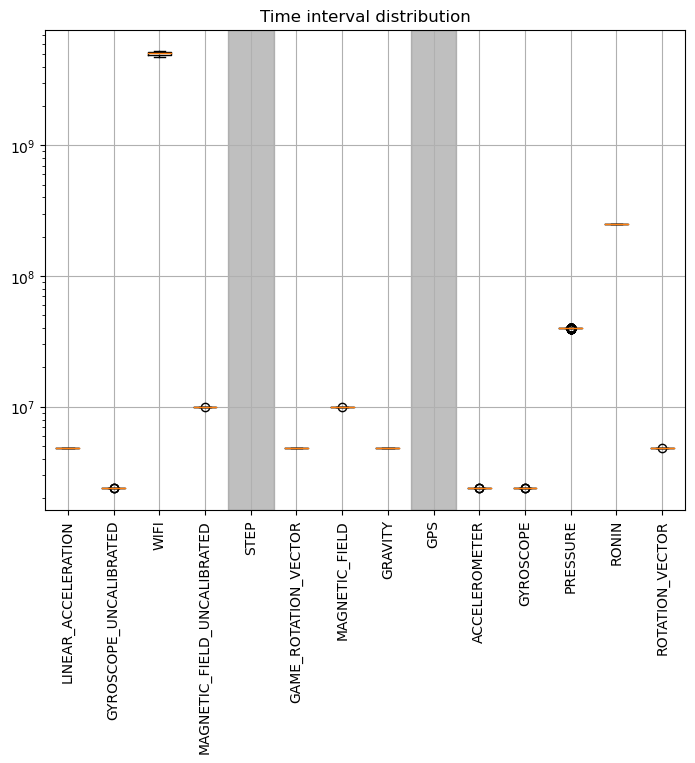

In [116]:
intv_stat = foo.describe_interval()

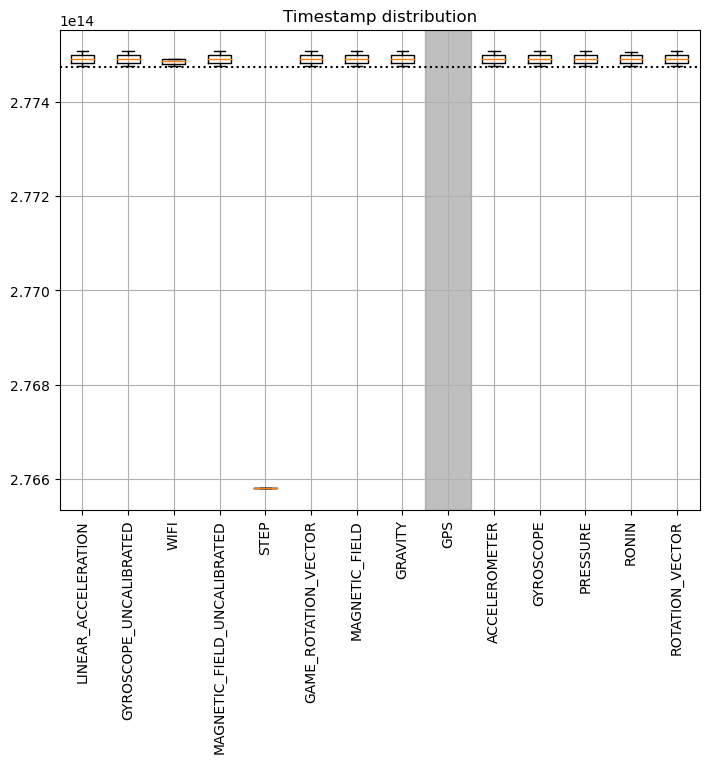

In [114]:
time_stat = foo.describe_time()

# ETC

In [3]:
# SensorData class debugging
# test __init__. __init__ method calles setter method of time and data property.
A = Data.SensorData()
B = Data.SensorData(data=[0,1,2],time=[3,4,5])

C:\Users\user\Workspace\AndroidSensorData\Data.py:123: UserWarning: This method is on development!
  warnings.warn('This method is on development!')


In [4]:
# test getter method of time and data property
print(A.time, B.time) # prints a warning since time getter is not fully implemented.
print(A.data, B.data)

None [3, 4, 5]
None [0, 1, 2]


In [5]:
# test deleter method of time and data property
del A.time, B.time # prints a warning to remind the developer to reassigne value to time instance.
del A.data, B.data # prints a warning to remind the developer to reassigne value to data instance.

C:\Users\user\Workspace\AndroidSensorData\Data.py:130: UserWarning: time attirubte must be reassigned before using this instance!
  warnings.warn('time attirubte must be reassigned before using this instance!')
C:\Users\user\Workspace\AndroidSensorData\Data.py:87: UserWarning: data attirubte must be reassigned before using this instance!
  warnings.warn('data attirubte must be reassigned before using this instance!')
